# Gene expression

**Import**

In [1]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import diffxpy.api as dxpy
import plotly.express as px

In [2]:
adata_input = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/HUM/cluster_adata.h5ad'

In [3]:
adata = sc.read(adata_input)

In [4]:
#open human lncRNA txt file
HUM_lncRNAs = []
f = open('/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping/annotation_starsolo/lncRNAs.txt', "r")
for line in f:
    l = line.strip('\n')
    HUM_lncRNAs.append(l)
print(f)
f.close()

<_io.TextIOWrapper name='/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping/annotation_starsolo/lncRNAs.txt' mode='r' encoding='UTF-8'>


In [5]:
adata

AnnData object with n_obs × n_vars = 14822 × 28403
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'Undif. SG_score', 'Dif. SG_score', 'SC.I_score', 'SC.II_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.4', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'DE_leiden_celltype', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'leiden_R.4_colors', 'neighbors', 'pca', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectivities', 'd

In [6]:
category_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage']

In [7]:
palette_dict = {"Undif. SG":'lightblue',"Dif. SG":'blue',"SC.I":'lightgreen','SC.II':'green','Early round SD':'yellow','Late round SD':'orange','Elong. SD':'red','Sertoli':'pink','Macrophage':'brown'}

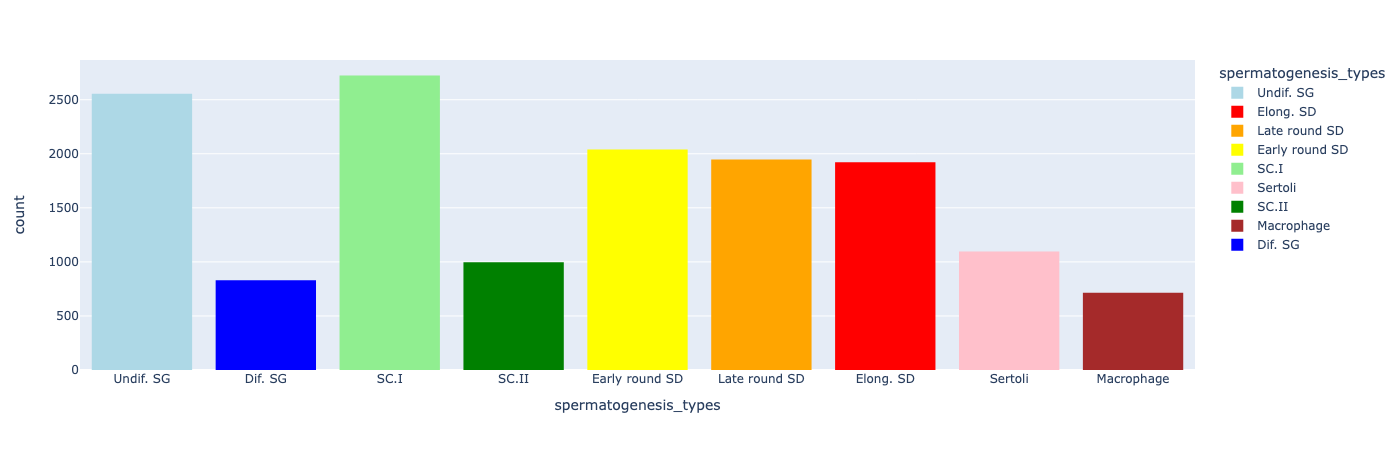

In [8]:
fig = px.histogram(adata.obs['spermatogenesis_types'], x='spermatogenesis_types', color='spermatogenesis_types',color_discrete_map=palette_dict)
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=category_order
    ),
    autosize=False,
    width=800,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()


In [9]:
# LINC genes, True/False vector
LINC = ['LINC' in i for i in adata.var_names] 

In [10]:
LINC_genes = adata[:,LINC].var_names

In [11]:
LINC_genes

Index(['LINC01409', 'LINC00115', 'LINC01128', 'LINC01786', 'LINC01770',
       'LINC01134', 'LINC01346', 'LINC01345', 'LINC02780', 'LINC01777',
       ...
       'LINC01278', 'LINC00630', 'LINC02589', 'LINC01285', 'LINC00629',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1686)

1686 LINC genes in total are expressed

In [12]:
shared_lnc = []
for gene in HUM_lncRNAs:
        if gene in adata.var_names:
            shared_lnc.append(gene)
len(shared_lnc)

11028

In [12]:
#sc.pl.stacked_violin(adata, genes_to_plot, groupby='spermatogenesis_types', rotation=10);

In [13]:
#ax = sc.pl.stacked_violin(adata, groupby='spermatogenesis_types', swap_axes=False, dendrogram=True)


In [14]:
#sc.pl.violin(adata, [], groupby='spermatogenesis_types');

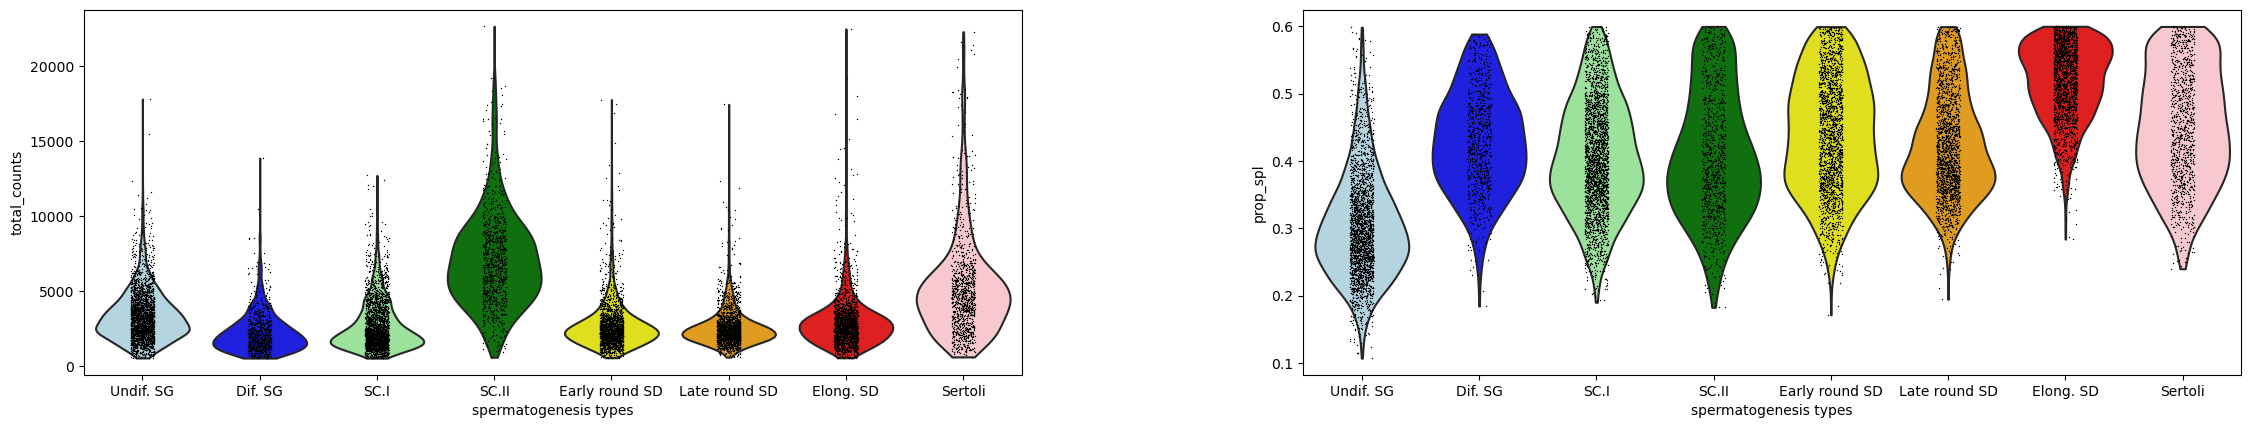

In [13]:
with rc_context({'figure.figsize': (10, 5)}):
    sc.pl.violin(adata, ['total_counts', 'prop_spl'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

In [14]:
adata

AnnData object with n_obs × n_vars = 14822 × 28403
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'Undif. SG_score', 'Dif. SG_score', 'SC.I_score', 'SC.II_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.4', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'DE_leiden_celltype', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'leiden_R.4_colors', 'neighbors', 'pca', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectivities', 'd

In [17]:
adata.uns['DE_leiden_celltype']['names']

array([('AUTS2', 'CNBD1', 'PRM2', 'LINC00917', 'MALAT1', 'AGBL4', 'ANKRD20A4-ANKRD20A20P', 'GPC5', 'MTUS2'),
       ('PTMA', 'NLRP1', 'HMGB4', 'CCDC91', 'NEAT1', 'LOC100506207', 'DPY19L2', 'SYNE2', 'CALN1'),
       ('amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/12F/12G/12H/12J', 'RBAKDN', 'PRM1', 'FAM186A', 'RBMS3', 'TTC28', 'STRBP', 'ERBB4', 'PARD3'),
       ('SMYD3', 'OBSL1', 'SCP2D1', 'LINC01492', 'IGFBP7', 'HORMAD1', 'ANKRD30B', 'ZBTB20', 'NLGN1'),
       ('CALN1', 'RBAK-RBAKDN', 'DNAJB7', 'MGAT4C', 'B2M', 'LINC01572', 'ANKRD20A1', 'CADM1', 'LTBP1'),
       ('amplicon-chrX-SSX1/2/2B/344B/5/7', 'TSBP1', 'TNP1', 'GOLGA6L7', 'FTL', 'CCDC144A', 'C1QTNF3', 'MTRNR2L8', 'GRIP1'),
       ('SPIDR', 'LRRIQ1', 'GTSF1L', 'LRRTM3', 'PTGDS', 'SCMH1', 'MGAT4D', 'NEAT1', 'NALF1'),
       ('RPS2', 'COX7A2', 'LOC100996249', 'PLCZ1', 'TMSB4X', 'ATRNL1', 'CCDC144A', 'CARMIL1', 'BMPR1B'),
       ('NASP', 'LINC01500', 'SIRT2', 'STXBP5-AS1', 'FTX', 'SYCP1', 'LINC01206', 'SYNE1', 'AFF3'),
       ('GAGE12B

In [18]:
top50 = pd.DataFrame(adata.uns['DE_leiden_celltype']['names']) # top 5 ranked genes for each cluster

top50.head()

Dif. SG Early round SD Elong. SD  \
0                                              AUTS2          CNBD1      PRM2   
1                                               PTMA          NLRP1     HMGB4   
2  amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/1...         RBAKDN      PRM1   
3                                              SMYD3          OBSL1    SCP2D1   
4                                              CALN1    RBAK-RBAKDN    DNAJB7   

  Late round SD Macrophage          SC.I                  SC.II Sertoli  \
0     LINC00917     MALAT1         AGBL4  ANKRD20A4-ANKRD20A20P    GPC5   
1        CCDC91      NEAT1  LOC100506207                DPY19L2   SYNE2   
2       FAM186A      RBMS3         TTC28                  STRBP   ERBB4   
3     LINC01492     IGFBP7       HORMAD1               ANKRD30B  ZBTB20   
4        MGAT4C        B2M     LINC01572              ANKRD20A1   CADM1   

  Undif. SG  
0     MTUS2  
1     CALN1  
2     PARD3  
3     NLGN1  
4     LTBP1

In [27]:
# all lncRNA genes in the top 50 genes
top50_lnc = {'Undif. SG':[],'Dif. SG':[],'SC.I':[],'SC.II':[],'Early round SD':[],'Late round SD':[],'Elong. SD':[],'Sertoli':[],'Macrophage':[]}

for celltype, genes in top50.items():
    for gene in genes:
        if gene in HUM_lncRNAs:
            top50_lnc[celltype].append(gene)

In [20]:
top50_lnc

{'Undif. SG': ['LOC105376755', 'LOC105374557', 'LOC442028', 'LINC01193'],
 'Dif. SG': ['LOC105377171', 'LOC107986770', 'LOC101928688'],
 'SC.I': ['LOC100506207',
  'LINC01572',
  'TEX41',
  'LOC105373592',
  'LOC105373554',
  'LINC00466'],
 'SC.II': ['ANKRD20A4-ANKRD20A20P',
  'LINC01206',
  'ADD3-AS1',
  'AP4B1-AS1',
  'LOC105379207',
  'LOC105369228',
  'LOC102724151',
  'F11-AS1',
  'LOC440910',
  'LOC646762',
  'LINC00342'],
 'Early round SD': ['RBAKDN',
  'LINC01500',
  'ZNF133-AS1',
  'GRM7-AS3',
  'LINC01609',
  'LOC101928236',
  'PCDH9-AS3',
  'LOC101929492',
  'LINC02235',
  'LINC01911',
  'LOC112268205'],
 'Late round SD': ['LINC00917',
  'LINC01492',
  'STXBP5-AS1',
  'LINC02842',
  'LOC105375387',
  'LINC01988',
  'ILRUN-AS1',
  'CRPPA-AS1',
  'LOC100134040',
  'LOC101929998',
  'LINC01500',
  'LOC105377955',
  'LOC105373593',
  'LOC105375409'],
 'Elong. SD': ['LOC100996249',
  'LINC00265',
  'LOC102723490',
  'LOC101928278',
  'LOC105376108',
  'SPATA42',
  'LOC105375477',

In [21]:
lnc_count = {}

for celltype, genes in top50_lnc.items():
    lnc_count[celltype]=len(genes)

In [22]:
lnc_count

{'Undif. SG': 4,
 'Dif. SG': 3,
 'SC.I': 6,
 'SC.II': 11,
 'Early round SD': 11,
 'Late round SD': 14,
 'Elong. SD': 12,
 'Sertoli': 7,
 'Macrophage': 7}

In [40]:
highly = []
not_highly = []
for celltype, genes in top50_lnc.items():
    for gene in genes:
        if adata.var['highly_variable'][gene]:
            highly.append(gene)
        else:
            not_highly.append(gene)

In [41]:
len(highly)

20

In [42]:
len(not_highly)

55

In [44]:
toplot_highly = []
toplot_not_highly = []
for gene in to_plot:
        if adata.var['highly_variable'][gene]:
            toplot_highly.append(gene)
        else:
            toplot_not_highly.append(gene)

In [45]:
toplot_highly

['LOC105377171', 'LOC100506207', 'RBAKDN', 'LOC100996249']

In [46]:
toplot_not_highly

['LOC105376755', 'ANKRD20A4-ANKRD20A20P', 'LINC00917', 'NEAT1', 'MALAT1']

In [28]:
adata

AnnData object with n_obs × n_vars = 14822 × 28403
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'Undif. SG_score', 'Dif. SG_score', 'SC.I_score', 'SC.II_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.4', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'DE_leiden_celltype', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'leiden_R.4_colors', 'neighbors', 'pca', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectivities', 'd

In [ ]:
# to compare to a certain gene across groups
# no. 4 in SC.II
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LOC101927284'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

In [ ]:
# no. 1 in sertoli
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LOC101929200'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

In [23]:
to_plot = []
to_plot = [top50_lnc[celltype][0] for celltype in top50_lnc]

In [24]:
to_plot

['LOC105376755',
 'LOC105377171',
 'LOC100506207',
 'ANKRD20A4-ANKRD20A20P',
 'RBAKDN',
 'LINC00917',
 'LOC100996249',
 'NEAT1',
 'MALAT1']

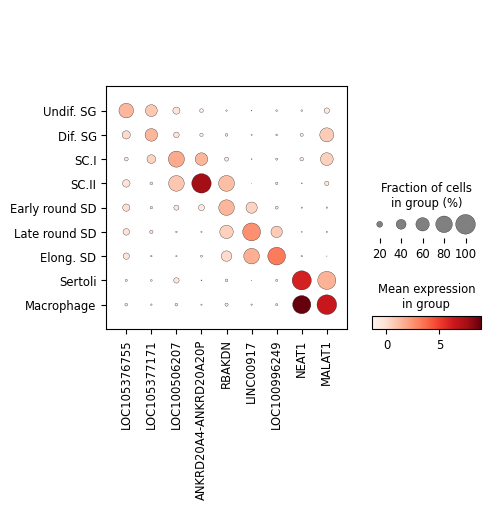

In [25]:
sc.pl.dotplot(adata, to_plot, groupby='spermatogenesis_types', categories_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage'])

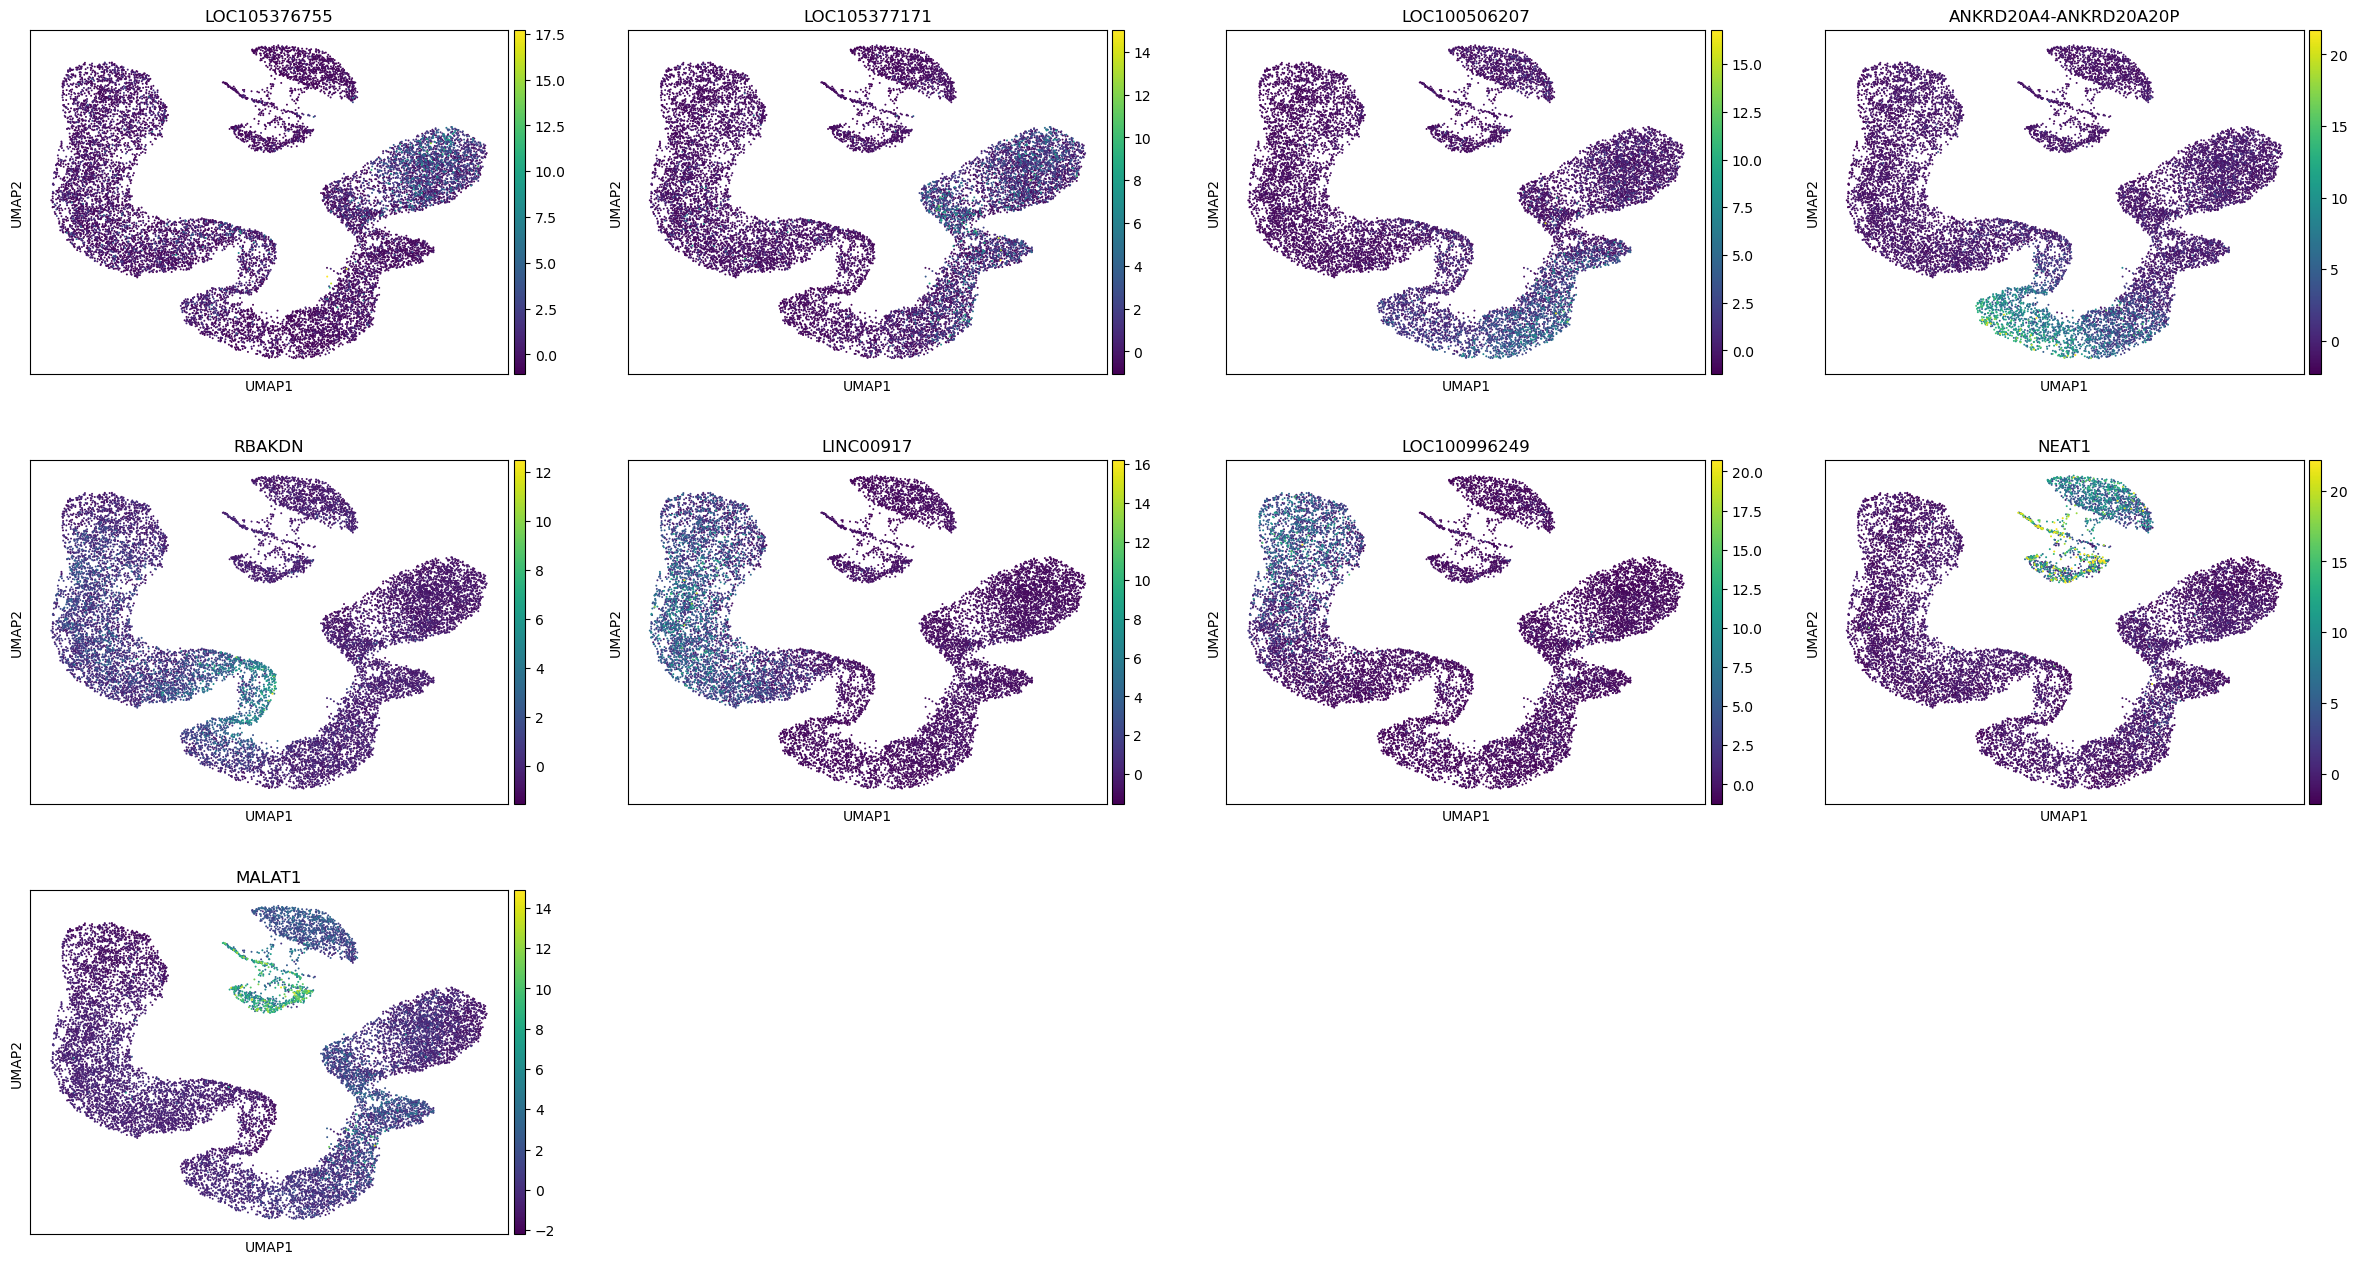

In [26]:
# UMAP colored by the top genes
# None of them in the species own annotation
sc.plotting.umap(adata, color=to_plot)

In [ ]:
adata

In [ ]:
adata.varm['PCs']

In [ ]:
adata.uns['pca']

PC1(1,72 % variance explained), PC2(0,93 % variance explained)

In [ ]:
sc.tl.dendrogram

In [ ]:
sc.pl.correlation_matrix(adata,'spermatogenesis_types', show_correlation_numbers=True)